<a href="https://colab.research.google.com/github/tanvi0915/K-Means-Clustering_BreastCancer/blob/main/BreastCancer(Exploratory_Data_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [39]:
import io
from google.colab import files 
uploaded = files.upload()

Saving breastCancer.csv to breastCancer (1).csv


In [40]:
df = pd.read_csv('breastCancer.csv')
df.head(5)


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [41]:
df.shape

(699, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [43]:
df = df.drop(columns = ['id'])

In [44]:
df['bare_nucleoli'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [45]:
df_absent = df[df['bare_nucleoli']=='?']
df_absent = df_absent.reset_index()
df_absent = df_absent.drop(columns=['index'])
df_absent

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,8,4,5,1,2,?,7,3,1,4
1,6,6,6,9,6,?,7,8,1,2
2,1,1,1,1,1,?,2,1,1,2
3,1,1,3,1,2,?,2,1,1,2
4,1,1,2,1,3,?,1,1,1,2
5,5,1,1,1,2,?,3,1,1,2
6,3,1,4,1,2,?,3,1,1,2
7,3,1,1,1,2,?,3,1,1,2
8,3,1,3,1,2,?,2,1,1,2
9,8,8,8,1,2,?,6,10,1,4


In [46]:
df_present = df[df['bare_nucleoli']!='?']
df_present = df_present.reset_index()
df_present = df_present.drop(columns=["index"])
df_present = df_present.astype(np.float64)
df_present.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


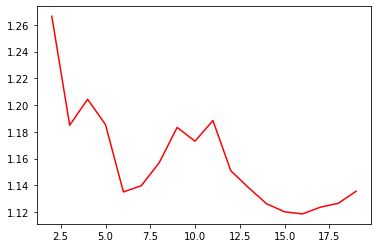

Best k parameter is  16


In [47]:
df_present_temp = df_present.drop(columns=['bare_nucleoli'])
xm = df_present_temp.values
ym = df_present['bare_nucleoli'].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(xm, ym, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

k_min = 2
test_MAE_array = []
k_array = []
MAE = 2
for k in range(2, 20):
    model = KNeighborsRegressor(n_neighbors=k).fit(train_x, train_y)
    
    y_predict = model.predict(test_x)
    y_true = test_y

    test_MAE = mean_absolute_error(y_true, y_predict)
    if test_MAE < MAE:
        MAE = test_MAE
        k_min = k

    test_MAE_array.append(test_MAE)
    k_array.append(k)
plt.plot(k_array, test_MAE_array,'r')
plt.show()
print("Best k parameter is ",k_min )

In [48]:
final_model = KNeighborsRegressor(n_neighbors=16).fit(xm,ym)

df_absent_temp = df_absent.drop(columns=['bare_nucleoli'])
df_absent_temp = df_absent_temp.astype(np.float64)
df_absent_temp.head()


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
0,8.0,4.0,5.0,1.0,2.0,7.0,3.0,1.0,4.0
1,6.0,6.0,6.0,9.0,6.0,7.0,8.0,1.0,2.0
2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
3,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0
4,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0


In [49]:
x_am = df_absent_temp.values
y_am = final_model.predict(x_am)
y_am

array([6.8125, 8.25  , 1.    , 1.    , 1.4375, 1.0625, 1.    , 1.1875,
       1.1875, 7.5   , 1.0625, 1.4375, 7.5   , 1.1875, 1.    , 1.5   ])

In [50]:
y_am = np.round(y_am)
y_am = y_am.astype(np.int64)
y_am

array([7, 8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 8, 1, 1, 2])

In [51]:
df_pred = pd.DataFrame({'bare_nucleoli':y_am})
df_pred

,bare_nucleoli
0,7
1,8
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,8


In [52]:
data_frame1 =  df_absent_temp.join(df_pred)
data_frame1 = data_frame1.astype(np.int64)
data_frame1

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nucleoli
0,8,4,5,1,2,7,3,1,4,7
1,6,6,6,9,6,7,8,1,2,8
2,1,1,1,1,1,2,1,1,2,1
3,1,1,3,1,2,2,1,1,2,1
4,1,1,2,1,3,1,1,1,2,1
5,5,1,1,1,2,3,1,1,2,1
6,3,1,4,1,2,3,1,1,2,1
7,3,1,1,1,2,3,1,1,2,1
8,3,1,3,1,2,2,1,1,2,1
9,8,8,8,1,2,6,10,1,4,8


In [53]:
df_join_2 = df_present['bare_nucleoli']
data_frame_2 = df_present_temp.join(df_join_2)
data_frame_2 = data_frame_2.astype(np.int64)
data_frame_2.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nucleoli
0,5,1,1,1,2,3,1,1,2,1
1,5,4,4,5,7,3,2,1,2,10
2,3,1,1,1,2,3,1,1,2,2
3,6,8,8,1,3,3,7,1,2,4
4,4,1,1,3,2,3,1,1,2,1


In [54]:
dataset = [data_frame1, data_frame_2]
dataset = pd.concat(dataset)
dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nucleoli
0,8,4,5,1,2,7,3,1,4,7
1,6,6,6,9,6,7,8,1,2,8
2,1,1,1,1,1,2,1,1,2,1
3,1,1,3,1,2,2,1,1,2,1
4,1,1,2,1,3,1,1,1,2,1


In [55]:
dataset.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class', 'bare_nucleoli'],
      dtype='object')

In [56]:
cols = ['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'bare_nucleoli', 'class']
dataset = dataset[cols]
dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli,class
0,8,4,5,1,2,7,3,1,7,4
1,6,6,6,9,6,7,8,1,8,2
2,1,1,1,1,1,2,1,1,1,2
3,1,1,3,1,2,2,1,1,1,2
4,1,1,2,1,3,1,1,1,1,2


In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset.iloc[:,9] = labelencoder_Y.fit_transform(dataset.iloc[:,9].values)
dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli,class
0,8,4,5,1,2,7,3,1,7,1
1,6,6,6,9,6,7,8,1,8,0
2,1,1,1,1,1,2,1,1,1,0
3,1,1,3,1,2,2,1,1,1,0
4,1,1,2,1,3,1,1,1,1,0


In [58]:
dataset['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


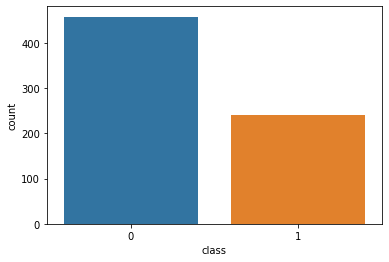

In [59]:
count_plot = dataset.iloc[:,9]
sb.countplot(count_plot)
plt.show()

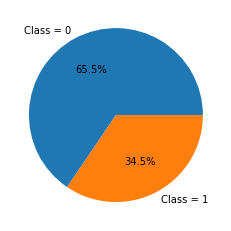

In [60]:
fig, ax = plt.subplots(1,1)
ax.pie(dataset['class'].value_counts(),autopct='%1.1f%%', labels=['Class = 0','Class = 1'])
plt.axis = 'equal'

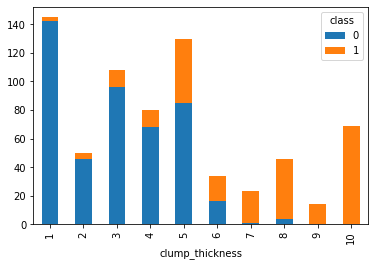

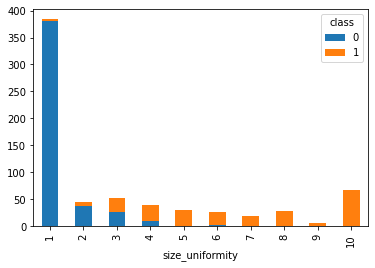

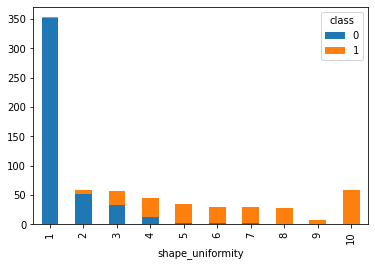

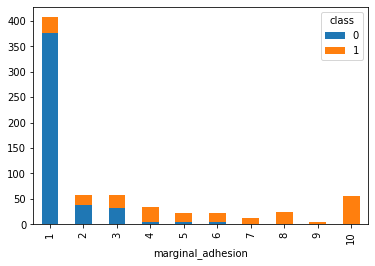

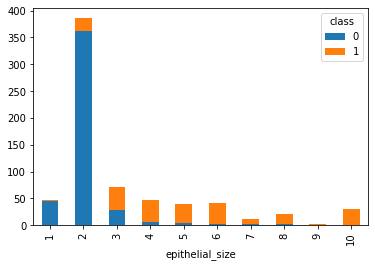

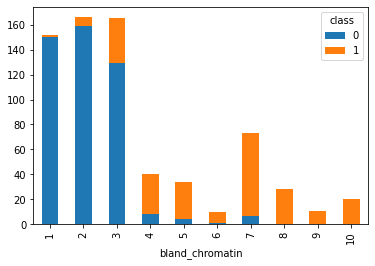

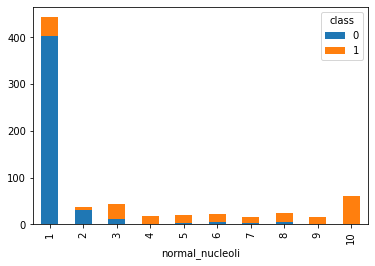

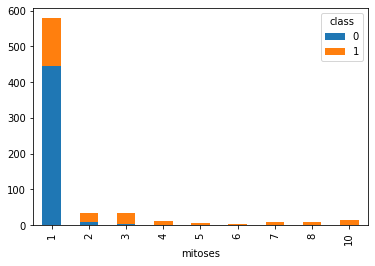

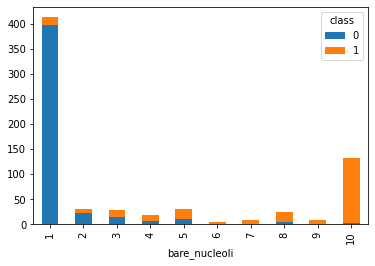

In [61]:
for i in range(9):
    column = dataset.iloc[:,i]
    graph = pd.crosstab(column,dataset['class'])
    graph.plot.bar(stacked=True)
    plt.show()

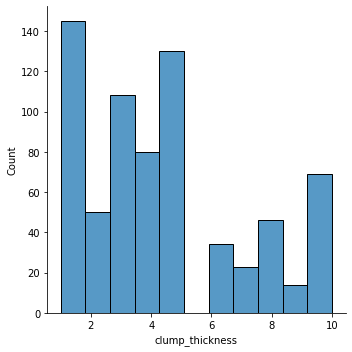

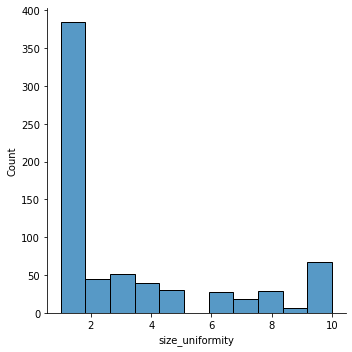

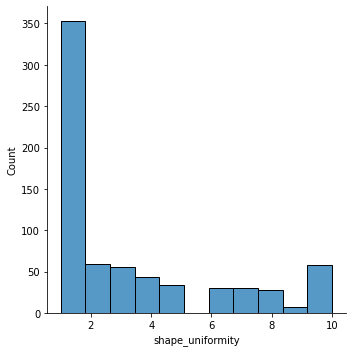

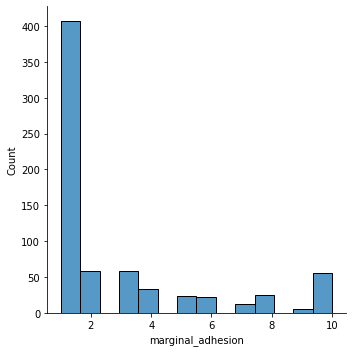

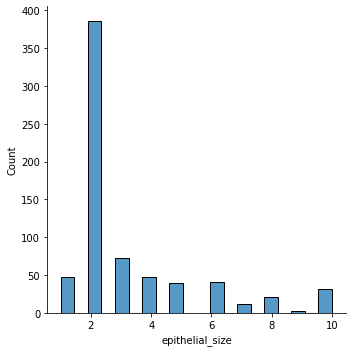

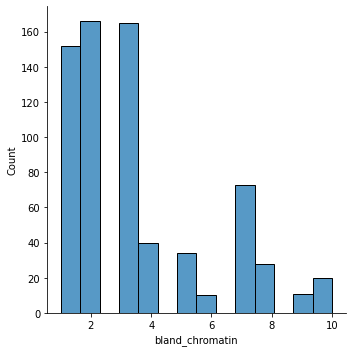

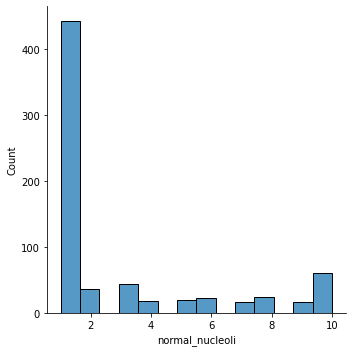

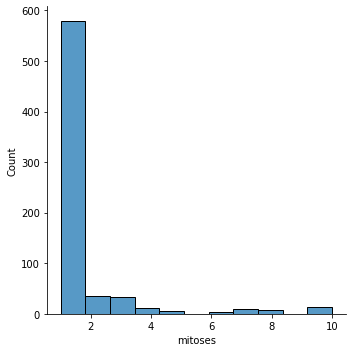

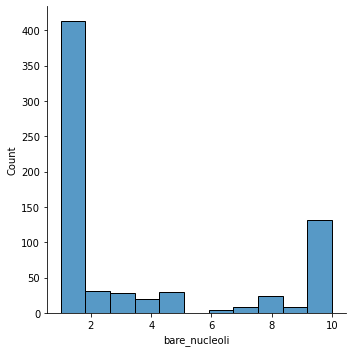

In [62]:
for i in range(9):
    distribution = dataset.iloc[:,i]
    graph = sb.displot(distribution)
    plt.show()

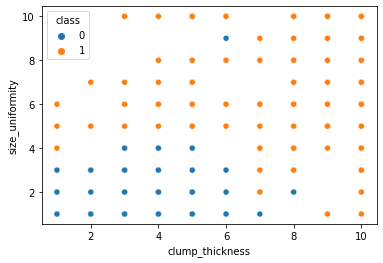

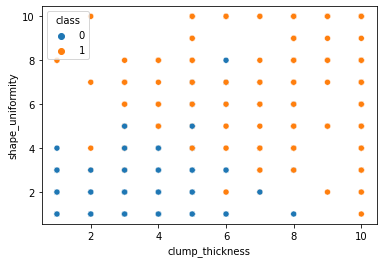

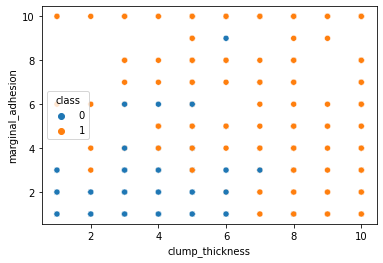

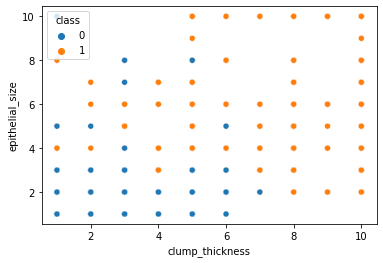

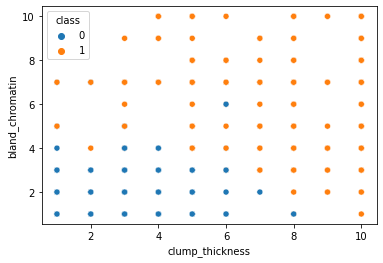

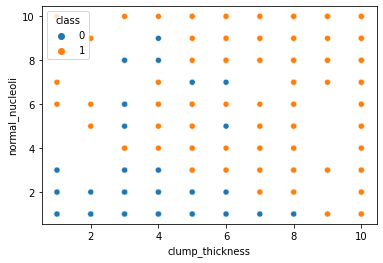

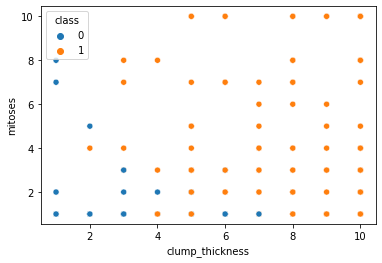

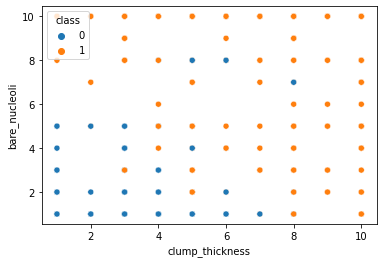

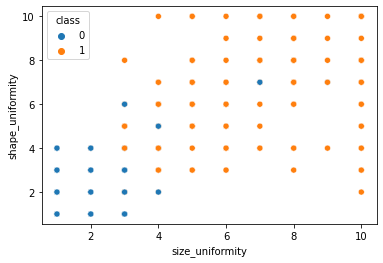

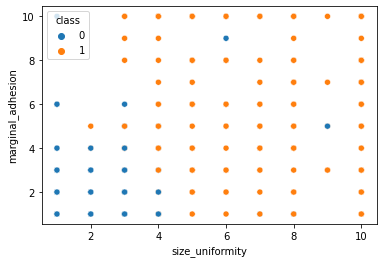

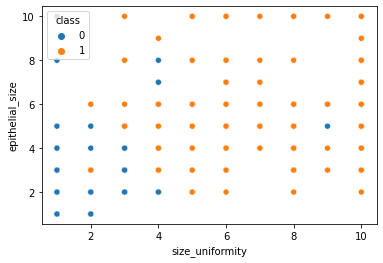

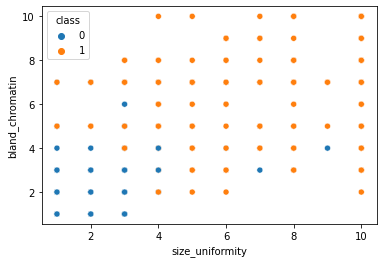

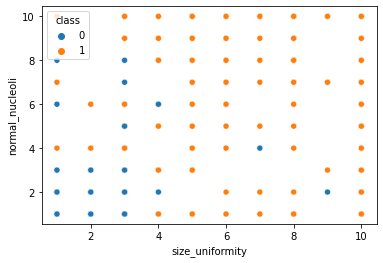

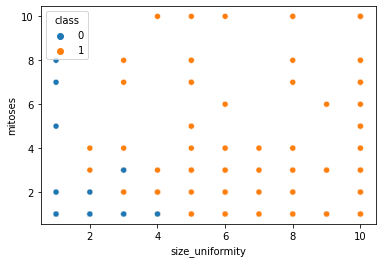

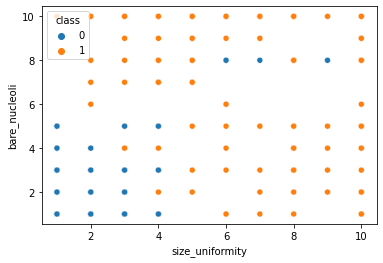

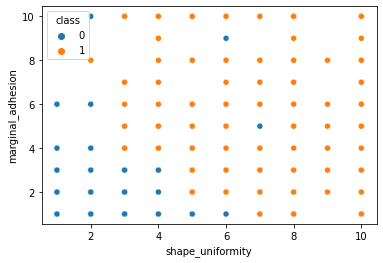

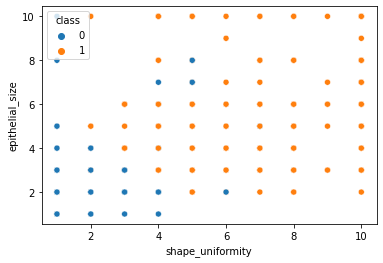

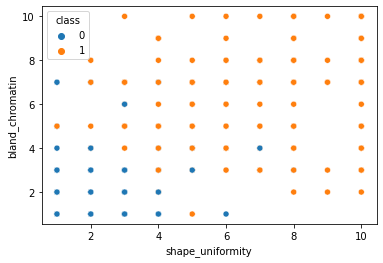

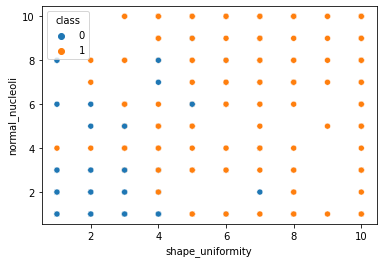

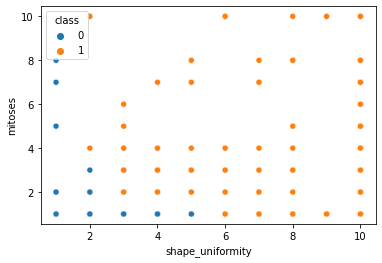

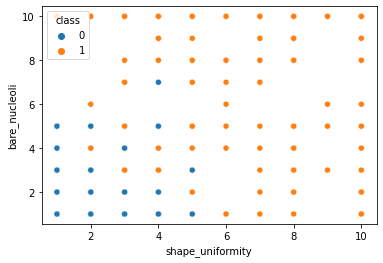

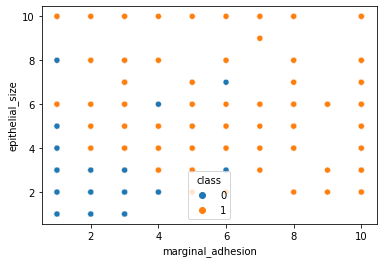

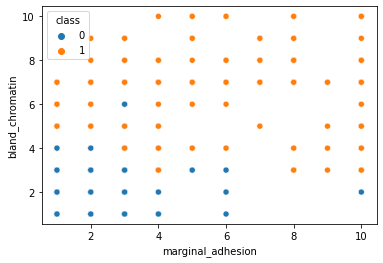

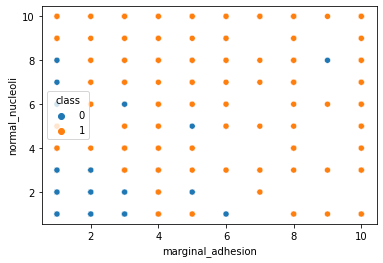

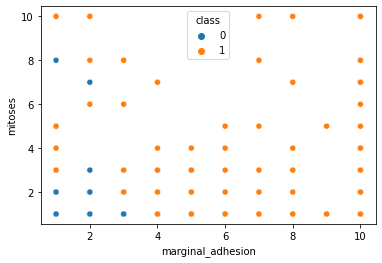

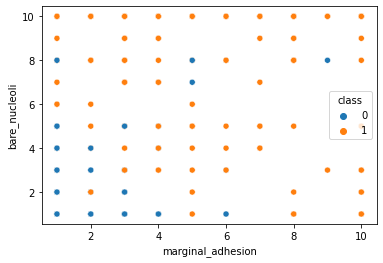

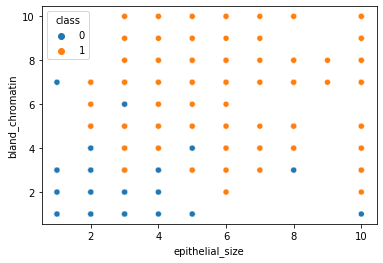

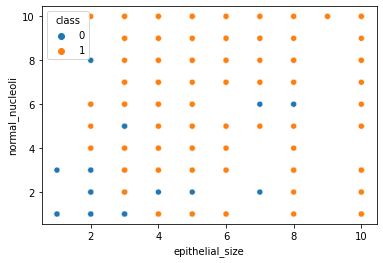

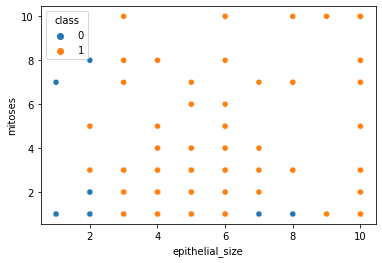

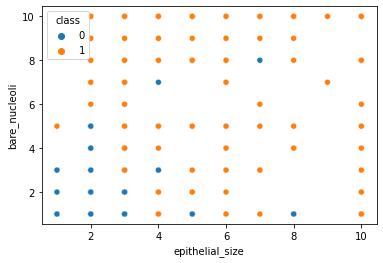

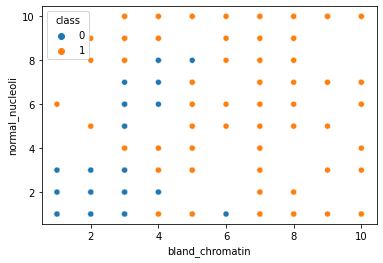

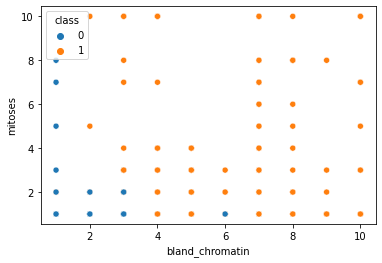

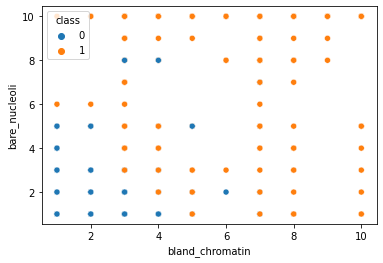

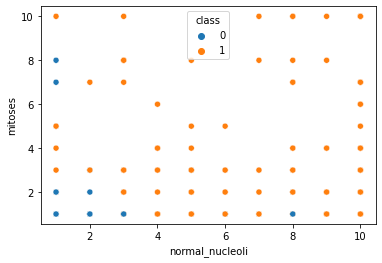

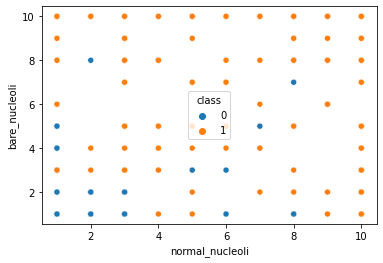

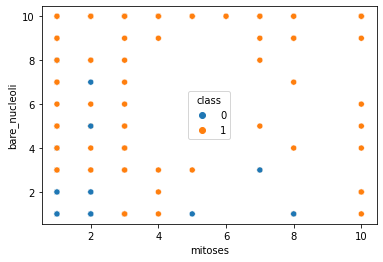

In [65]:
for i in range(9):
    x = dataset.iloc[:,i]
    for j in range(i+1,9):
        y = dataset.iloc[:,j]
        hue_parameter = dataset['class']
        ax = sb.scatterplot(x=x, y=y, hue=hue_parameter)
        plt.show()
